In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch
import argparse
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from models.soft_shift_net.innerSoftShiftTriple import InnerSoftShiftTriple
#from models.accelerated_shift_net.accelerated_InnerShiftTriple import AcceleratedInnerShiftTriple
from options.train_options import TrainOptions 


In [2]:
dataroot = '/mnt/hdd2/AIM/DAGM/Class4_def/' # ENTER HERE THE PATH YOU WANT TO USE AS DATAROOT
options = '--dataroot {}'.format(dataroot).split(' ')

In [3]:
def get_parser(options=None):
    parser = TrainOptions()
    parser.parse(options=options)
    return parser

In [4]:
parser = get_parser(options=options)

----------------- Options ---------------
           add_mask2input: 1                             
                batchSize: 1                             
                    beta1: 0.5                           
               bottleneck: 512                           
          checkpoints_dir: ./log                         
                constrain: MSE                           
           continue_train: False                         
                 dataroot: /mnt/hdd2/AIM/DAGM/Class4_def/	[default: ./datasets/Paris/train]
             dataset_mode: aligned                       
              discounting: 1                             
              display_env: main                          
             display_freq: 10                            
               display_id: 1                             
            display_ncols: 5                             
             display_port: 8097                          
           display_server: http://localhost           

In [5]:
opt = parser.opt

In [947]:
import numpy as np
from skimage import io
from skimage.transform import resize
import util.util as util
torch.cuda.is_available()

True

In [948]:
N = 64

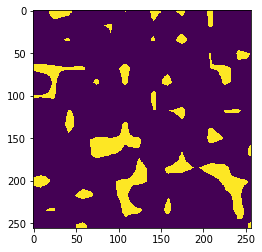

In [998]:
mask_i = util.wrapper_gmask(opt)
plt.imshow(np.squeeze(mask_i))
mask_i_32 = resize(np.squeeze(mask_i.cpu().numpy()), (N, N))

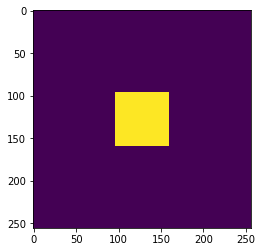

In [950]:
h, w = (256, 256)
hh = h//2
wh = w//2
hm_size = hh//4
mask_i = np.zeros((h, w))
mask_i[hh - hm_size:hh + hm_size, wh - hm_size:wh + hm_size] = 1
plt.imshow(mask_i)
h, w = (N, N)
hh = h//2
wh = w//2
hm_size = hh//4
mask_i_32 = np.zeros((h, w))
mask_i_32[hh - hm_size:hh + hm_size, wh - hm_size:wh + hm_size] = 1

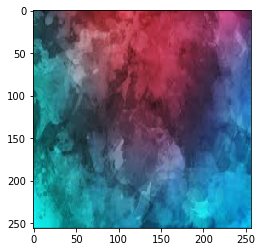

In [999]:
im_o = io.imread('images?q=tbn:ANd9GcQdZHoh1hgMFbOuCRH5_uhGhm5U29oPQJihawtfBLGCNQryUB5qew')
im_o_256 = resize(im_o, (256, 256))
im_o_32 = resize(im_o_256, (N, N))
plt.imshow(im_o_256)
plt.show()
im = np.array([im_o_32])
im = torch.from_numpy(im)
im = im.permute((0, 3, 1, 2))

In [1000]:
im_t = im
mask_t = torch.from_numpy(mask_i_32).unsqueeze(0).unsqueeze(0)

In [1001]:
mask_t = mask_t >0

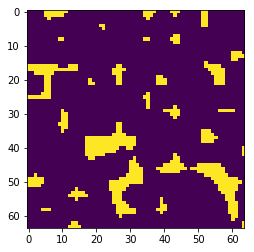

In [1002]:
plt.imshow(np.squeeze(mask_t))

In [1029]:
%timeit image = util.distance_pixel_mixing(im_t, mask_t)

219 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1023]:
image = np.squeeze(image.cpu().numpy()).transpose((1, 2, 0))

In [1024]:
m = np.squeeze(mask_i)[..., np.newaxis]

In [1025]:
f_img = resize(image, (256, 256))  * m.numpy()

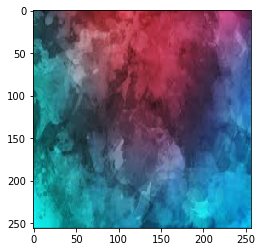

In [1026]:
plt.imshow(im_o_256)

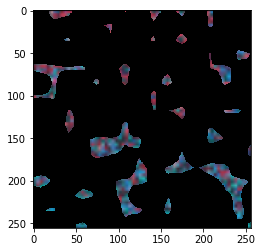

In [1027]:
plt.imshow(f_img)